<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%20/pandas/pandas_3_%ED%83%90%EC%83%89_0531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Contents
- 결합 탐색
- 조건 탐색
- 변수 탐색
- 인코딩
- 시각적 탐색

In [18]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [19]:
# 2개의 데이터 프레임 합치기
con1 = pd.concat([df1, df2], axis=0)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [20]:
# 정리 (인덱스 1 - 8로)
con1 = pd.concat([df1, df2], axis=0, ignore_index=True)
con1


,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [21]:
# 열 방향으로 합치기 (axis = 0 -> 1)
con1 = pd.concat([df1, df2], axis=1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


####merge()
* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [22]:
#
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [23]:
#
df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


In [24]:
# merge()를 이용한 결합, default = 교집합
pd.merge(df1, df2, on='ind')    # default 교집합

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [25]:
# merge() how='outer' 일 떄 , 합집합
pd.merge(df1, df2, on='ind', how='outer')

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [26]:
df1 = df1.drop('ind', axis=1)
df2 = df2.drop('ind', axis=1)
print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


####join()
* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [27]:
# join은 인덱스를 기준으로 결합(default는 교집합)
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how='inner')


,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [28]:
# outer인 경우
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


####파일 탐색

In [29]:
import numpy as np
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임으로 만들기
filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/stock price.xlsx' # 왼쪽
filepath2 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/stock valuation.xlsx' # 오른쪽
df1 = pd.read_excel(filepath1, engine='openpyxl', index_col='id')
df2 = pd.read_excel(filepath2, engine='openpyxl', index_col='id')
print(df1, '\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how = 'left' 옵션이 기본 적용
df3 = df1.join(df2)
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [32]:
df4 = df1.join(df2, how='right')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359


In [33]:
# 데이터프레임 결합(inner) = 교집합
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
df5 = df1.join(df2, how='inner')
df5

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


Q. df5에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df6 이름으로 저장 및 출력하세요 (단, '<'와 '=='을 반드시 사용해야함)

In [34]:

df5 = df1.join(df2, how='inner')
# 중복 된 칼럼 삭제
# drop 메서드에서 inplace=True를 사용하면 df5 변수에 None이 할당되기 때문에, 이후 df5에 접근할 수 없습니다
# df5 = df5.drop('name', axis=1, inplace=True)
df5.drop('name', axis=1, inplace=True)

# eps 3000 적거나 stock_name이 이마트 선택 (or은 파이썬 논리연산자, |은 판다스 비트 연산자)
# df6 = df5[(df5['eps'] < 3000) or (df5['stock_name'] == '이마트')]
df6 = df5[(df5['eps'] < 3000) | (df5['stock_name'] == '이마트')]
df6

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [35]:
import numpy as np
data = np.arange(20).reshape(4, 5)

df = pd.DataFrame(data, columns=('a','b','c','d','e'))
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [36]:
df1 = df.copy()
print(df1, '\n')
# index 0 인 행 제거
df1.drop(df1.index[0], inplace=True)
df1

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [37]:
# a 행에서 a 가 10보다 큰 인덱스
idx = df1[df1.a > 10].index
print(idx, '\n')
# 그 인덱스 제거
df1.drop(idx, inplace=True)
df1

Index([3], dtype='int64') 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [38]:
df2 = df.copy()
df2.drop(0)
df2.drop(3)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [39]:
# df[&] : and 일때
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15

df[cond1 & cond2 & cond3]

,a,b,c,d,e
3,15,16,17,18,19


In [40]:
# df[|] : or 일때
cond1 = df.a > 5
cond2 = df.b == 16
cond3 = df.e > 5

df[cond1 | cond2 | cond3]

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [41]:
# 컨디션1에 맞춘 조건
df[cond1]
# 거기서 특정한 밸류 뽑을때
df[cond1][['a', 'b']]

,a,b
2,10,11
3,15,16


In [42]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
# 컬럼 이름 변경
tdf.rename(columns ={'sex':'gender', 'fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
# gender에서 famale = 1, male = 0으로 바꿀때

# 임시로 사용할 때
df1 = tdf[['gender']].replace(['female', 'male'], [1, 0])
print(df1)
df1.gender.value_counts()

     gender
0         1
1         0
2         0
3         0
4         1
..      ...
886       1
887       0
888       0
889       1
890       1

[891 rows x 1 columns]


gender
1    577
0    314
Name: count, dtype: int64

In [45]:
# 원본에 바로 반영
tdf1 = tdf.copy()
tdf1.gender.replace(['female', 'male'], [1, 0], inplace=True)
tdf1.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
# 컬럼 대문자 변경
tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
# 컬럼 소문자 변경
tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
df2 = df.copy()

In [49]:
# 원하는 컬럼 추출
columns_customed = ['pclass', 'sex', 'age', 'survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [50]:
tdf1 = tdf[['age', 'ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [51]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [52]:
# Dtype 변경
tdf1 = tdf1.astype({'age':'int', 'ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [53]:
# age 컬럼의 값 구성 체크
tdf.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [54]:
# age 컬럼의 값 구성 체크
age_counts_sorted = tdf.age.value_counts()
age_counts_sorted.sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [55]:
# age 컬럼이 고유 구성 요소
len(tdf.age.unique())

tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

age_category 함수를 만들기

In [56]:
# df6 = df5[(df5['eps'] < 3000) | (df5['stock_name'] == '이마트')]
def get_category(age):
    if age < 3:
        print('Baby')
    if 3 <= age < 7:
        print('Child')
    if 7 <= age < 13:
        print('Teenager')
    if 13 <= age < 19:
        print('Young Adult')
    if 19 <= age < 50:
        print('Adult')
    else:
        print('Elderly')





In [57]:
def get_category(age):
  if age < 5 : return 'Baby'
  elif age < 14 : return 'Child'
  elif age < 20 : return 'Teenager'
  elif age < 30 : return 'Young Adult'
  elif age < 70 : return 'Adult'
  else : return 'Elderly'
tdf['age_cat'] = tdf.age.apply(lambda x: get_category(x))
tdf[['age', 'age_cat']].head()

,age,age_cat
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult


In [58]:
# cut을 이용한 다른 방법
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf[['age', 'cat']]

,age,cat
0,22.0,Teenager
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
...,...,...
886,27.0,Young Adult
887,19.0,Teenager
888,NaN,NaN
889,26.0,Young Adult


####범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [59]:
#Label Endoing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender', 'age']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Teenager
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Young Adult


In [60]:

tdf2 = tdf[['gender', 'class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [61]:
#One-Hot Encoding
import pandas as pd
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


In [62]:
tdf.gender.value_counts()

gender
1    577
0    314
Name: count, dtype: int64

Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

####[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [63]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))

ts1 = ts.cumsum()
df = pd.DataFrame({'value':ts, 'dum':ts1})
df.head()

,value,dum
2020-01-01,-2.365356,-2.365356
2020-01-02,-0.130247,-2.495603
2020-01-03,0.056426,-2.439177
2020-01-04,-1.401188,-3.840364
2020-01-05,0.154244,-3.686121


####라인그래프

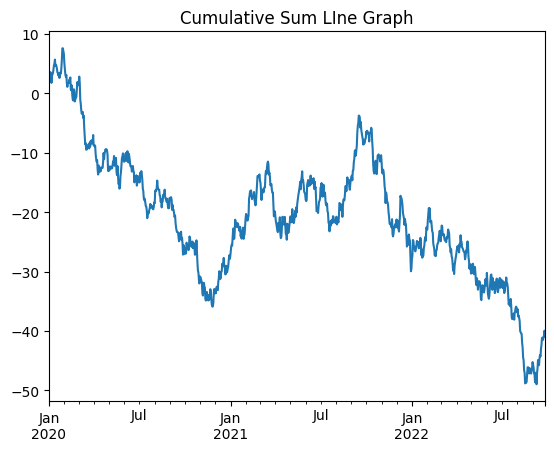

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 데이터 생성       (평균정규분포)
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title("Cumulative Sum LIne Graph")
plt.show()

In [65]:
mean_val = ts.mean()
std_dev = ts.std()
print(mean_val, std_dev)

-20.64925642212151 10.977702968100523


####막대그래프

              A         B
One   -2.508000 -0.384560
Two    0.671481  0.239070
Three -0.143935  0.328924
Four   1.390295  0.749431
Five  -0.089768 -1.307975 



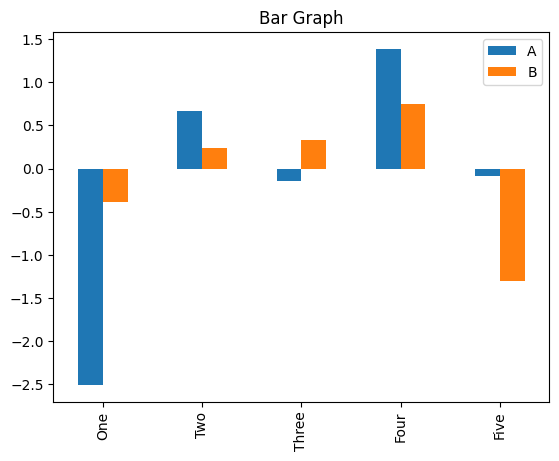

In [66]:
df = pd.DataFrame({
    'A' : np.random.randn(5),
    'B' : np.random.randn(5)
}, index = ['One', 'Two', 'Three', 'Four', 'Five'])
print(df, '\n')

# 막대 그래프
df.plot.bar()
plt.title("Bar Graph")
plt.show()


####히스토그램

             A         B
0     0.323964 -1.095639
1     0.705377 -1.269453
2    -0.941236  1.651248
3    -0.300309 -0.371608
4    -0.190543  1.772366
...        ...       ...
9995  0.290099  0.187313
9996  1.289977  1.487154
9997  0.140407 -0.087635
9998  1.056393 -0.243938
9999  1.137481  1.609853

[10000 rows x 2 columns] 



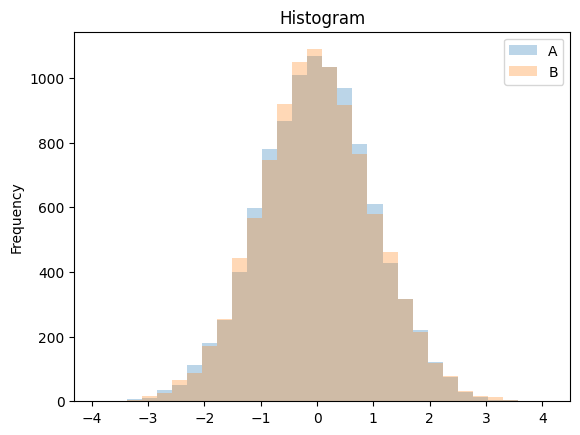

In [67]:
df = pd.DataFrame({
    'A' : np.random.randn(10000),
    'B' : np.random.randn(10000)
})
print(df, '\n')

# 히스토그램
df.plot.hist(alpha=0.3, bins=30)
plt.title("Histogram")
plt.show()

             A         B
0     0.948613  0.666702
1    -0.679804  0.523144
2     1.686605  0.937681
3     1.847050  0.742383
4    -0.045333 -0.738106
...        ...       ...
9995 -1.215485 -1.610872
9996 -0.821731 -0.662136
9997 -0.871996 -1.085657
9998 -0.638773  1.040674
9999 -0.268560 -0.393847

[10000 rows x 2 columns] 



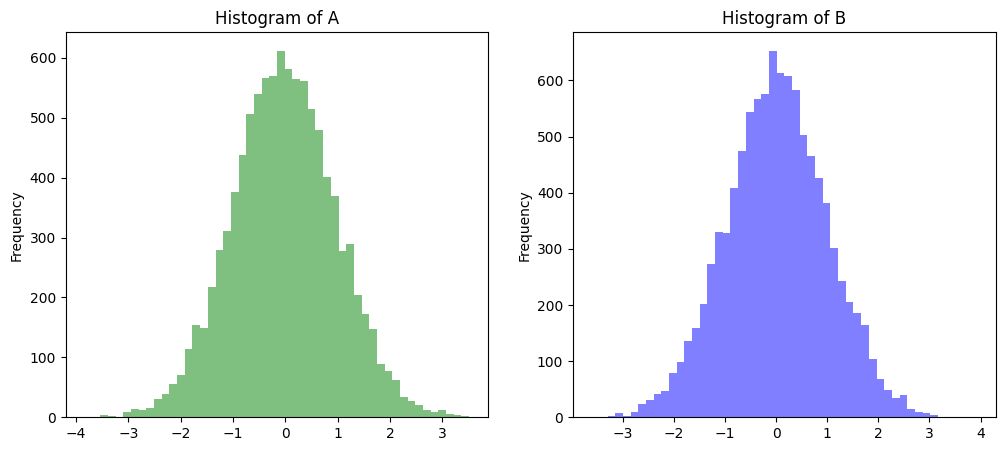

<Figure size 640x480 with 0 Axes>

In [68]:
df = pd.DataFrame({
    'A' : np.random.randn(10000),
    'B' : np.random.randn(10000)
})
print(df, '\n')

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=50, color='green')
plt.title('Histogram of A')

# 두번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=50, color='blue')
plt.title('Histogram of B')
plt.show()

#레이아웃을 조정합니다
plt.tight_layout()
plt.show()

####박스플롯

          A         B         C         D         E
0  0.612445  0.324435  0.289601  0.564931  0.965057
1  0.514973  0.215181  0.798384  0.821878  0.032365
2  0.521058  0.098534  0.449989  0.187050  0.861760
3  0.896812  0.586919  0.417633  0.526186  0.165775
4  0.600875  0.357809  0.990208  0.069722  0.252644
5  0.356507  0.297085  0.721427  0.044048  0.401469
6  0.785604  0.615535  0.339060  0.682669  0.870477
7  0.039734  0.482116  0.890418  0.391525  0.004729
8  0.826763  0.344754  0.403972  0.403143  0.610587
9  0.572193  0.238102  0.395992  0.203559  0.989528 



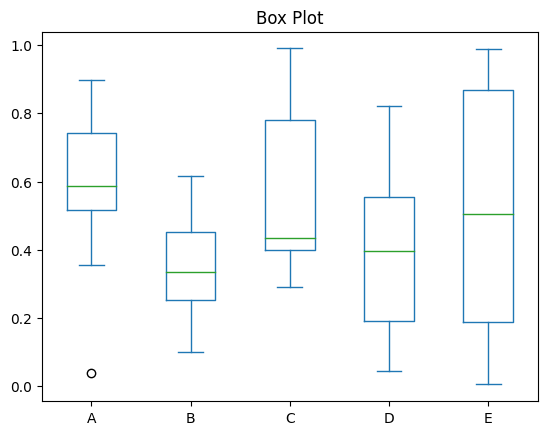

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
print(df, '\n')
df.describe()

# 박스 플롯
df.plot.box()
plt.title("Box Plot")
plt.show()

          A         B         C         D
0  0.840536  0.693804  0.552471  0.761625
1  0.910258  0.603625  0.333710  0.339215
2  0.752673  0.853742  0.785473  0.250603
3  0.977099  0.102194  0.690660  0.256425
4  0.760084  0.574164  0.857967  0.951533 



<function matplotlib.pyplot.show(close=None, block=None)>

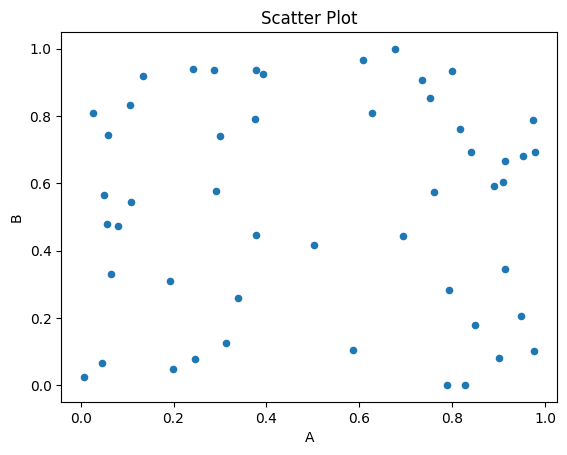

In [70]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['A','B','C','D'])
print(df.head(),'\n')
# 산점도
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

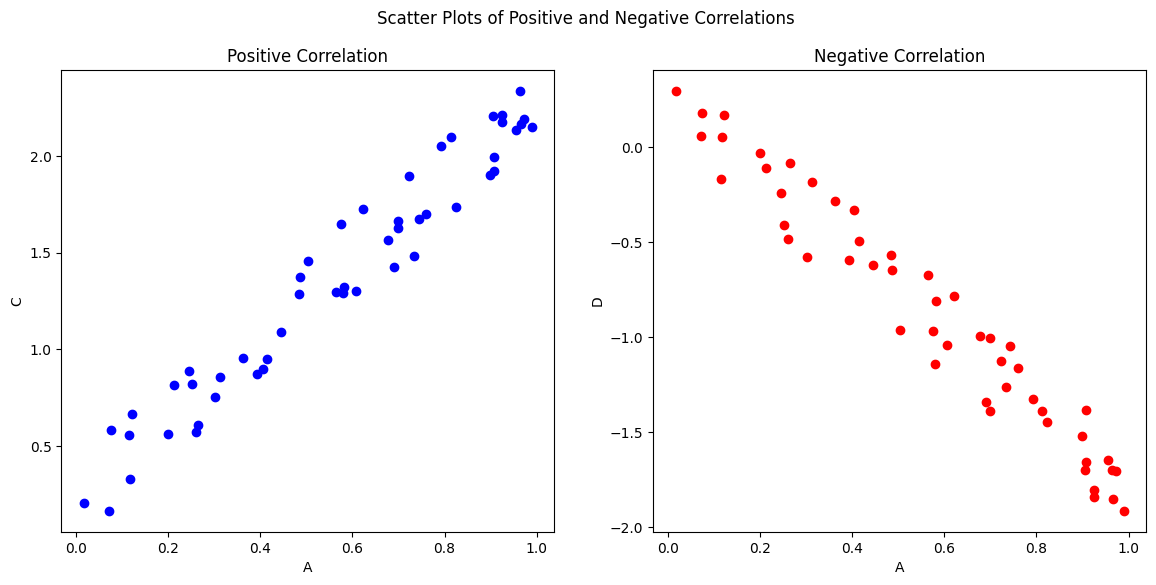

In [77]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['A','B','C','D'])

# 양의 상관관계
df['C'] = df['A'] * 2 + np.random.rand(50) * 0.5

# 음의 상관관계
df['D'] = -df['A'] * 2 + np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'],df['C'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'],df['D'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Plots of Positive and Negative Correlations')
plt.show

AttributeError: module 'matplotlib' has no attribute 'title'

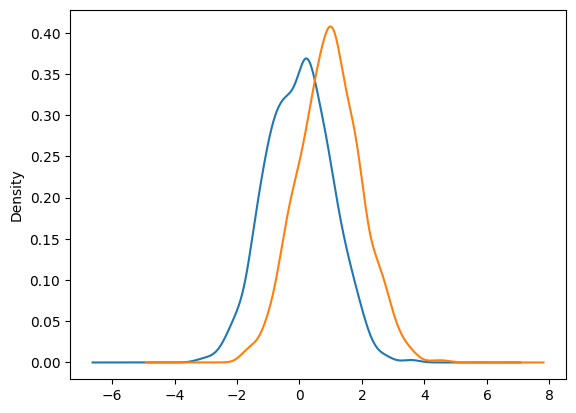

In [82]:
# 커널 밀도 추정(kde, Kernel Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프
import pandas as pd
import numpy as np
import matplotlib as plt

# 데이터 생성
data = pd.DataFrame({
   'A' : np.random.randn(1000),
   'B' : np.random.randn(1000) + 1
})

# KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Desity')
plt.legend()
plt.show()

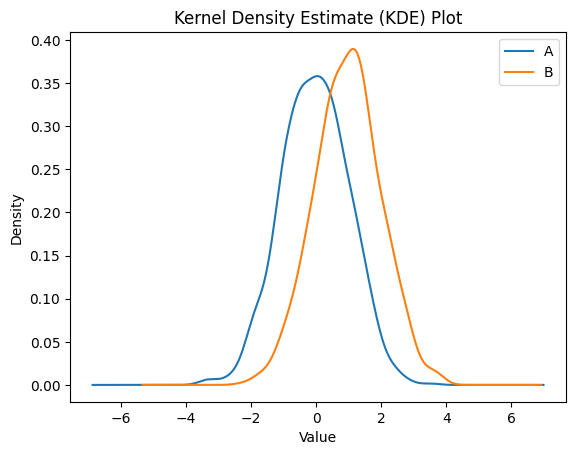

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = pd.DataFrame({
   'A': np.random.randn(1000),
   'B': np.random.randn(1000) + 1
})

# KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()  # Call show() as a function

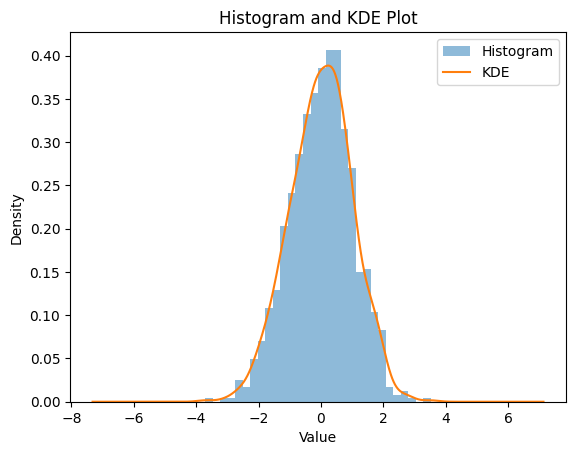

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
data = pd.Series(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기
ax = data.plot.hist(bins=30, alpha=0.5, density=True, label='Histogram')       # 히스토그램
data.plot.kde(ax=ax, label='KDE')       # KDE 그래프
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()